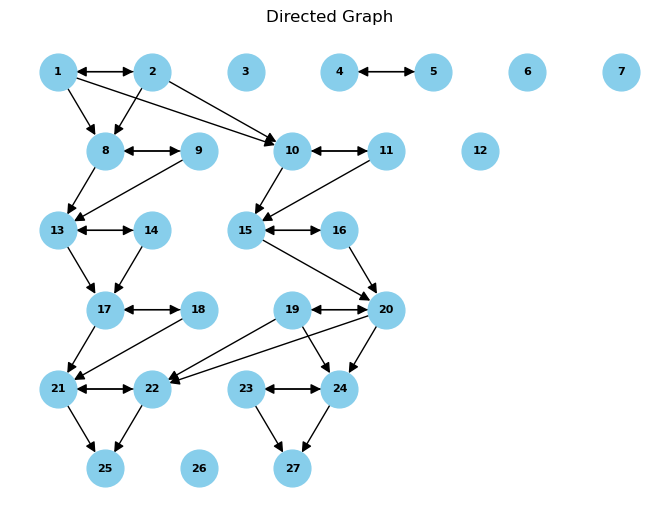

C:\ProgramData\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


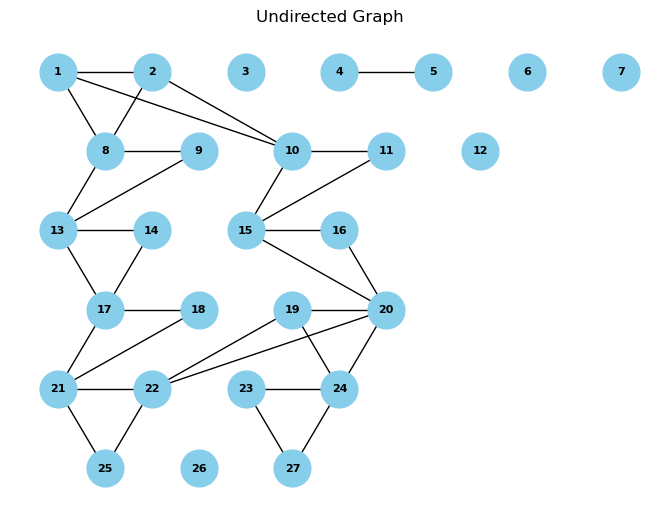

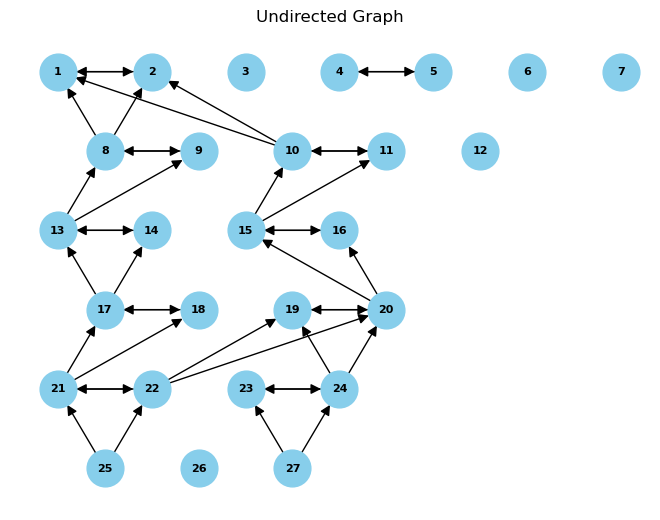

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G_directed = nx.DiGraph()

# each section of code is a "generation"
# g0
G_directed.add_nodes_from(list(range(1,8)))
G_directed.add_edges_from([(1,2), (2,1), (4,5), (5,4)], Relationship='Marriage')


# g1
G_directed.add_nodes_from(list(range(8,13)))
G_directed.add_edges_from([(1,8), (1,10), (2,8), (2,10)], Relationship= 'Parent-Child')
# new couple in g1
G_directed.add_edges_from([(8,9), (9,8), (10,11), (11,10)], Relationship = "Marriage")

# g2
G_directed.add_nodes_from(list(range(13,17)))
G_directed.add_edges_from([(8,13), (9,13), (10,15), (11,15)], Relationship = "Parent-Child")
# new couple in g2
G_directed.add_edges_from([(13,14), (14,13), (15,16), (16,15)], Relationship = "Marriage")

# g3
G_directed.add_nodes_from(list(range(17,21)))
G_directed.add_edges_from([(13,17), (14,17), (15,20), (16,20)], Relationship = "Parent-Child")
# new couple in g3
G_directed.add_edges_from([(17,18), (18,17), (19,20), (20,19)], Relationship = "Marriage")

# g4
G_directed.add_nodes_from(list(range(21,25)))
G_directed.add_edges_from([(17,21), (18,21), (19,24), (20,24), (19,22), (20,22)], Relationship = "Parent-Child")
# new couple in g4
G_directed.add_edges_from([(21,22), (22,21), (23,24), (24,23)], Relationship = "Marriage")

# g5
G_directed.add_nodes_from(list(range(25,28)))
G_directed.add_edges_from([(21,25), (22,25), (23,27), (24,27)], Relationship = "Parent-Child")

# position the nodes so you can see each "generation" (at least the ones that get married)
pos = {
    1: (1, 0),
    2: (2, 0),
    3: (3, 0),
    4: (4, 0),
    5: (5, 0),
    6: (6, 0),
    7: (7, 0),
    8: (1.5, -1),
    9: (2.5, -1),
    10: (3.5, -1),
    11: (4.5, -1),
    12: (5.5, -1),
    13: (1, -2),
    14: (2, -2),
    15: (3, -2),
    16: (4, -2),
    17: (1.5, -3),
    18: (2.5, -3),
    19: (3.5, -3),
    20: (4.5, -3),
    21: (1, -4),
    22: (2, -4),
    23: (3, -4),
    24: (4, -4),
    25: (1.5, -5),
    26: (2.5, -5),
    27: (3.5, -5),
    28: (4.5, -5)
}

# draw the directed graph
nx.draw(G_directed, pos=pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=15)
plt.title("Directed Graph")
plt.show()

# Convert the directed graph to an undirected graph
G_undirected = G_directed.to_undirected()

# Draw the converted undirected graph
nx.draw(G_undirected, pos=pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=15)
plt.title("Undirected Graph")
plt.show()

# Reverse edges in the directed graph
G_reversed = G_directed.reverse()

# Draw the reversed directed graph
nx.draw(G_reversed, pos=pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=15)
plt.title("Undirected Graph")
plt.show()

In [2]:
# Specify the source and target nodes for distance calculation
source_node = 25
target_node = 27

# Calculate the shortest path length
distance = nx.shortest_path_length(G_undirected, source=source_node, target=target_node)

print(f"Distance from node {source_node} to node {target_node}: {distance}")

Distance from node 25 to node 27: 4


In [6]:
def find_mate(source_node, distance, graph, list_unions, tol, current_generation=[], previous_single=[]):
    '''
    By using graph search method, it will find a node in previous or in current generation
    with the shortest desired distance from source_node.

    Paramater:
    source_node (int): a single node labeled with int
    distance (int): desired distance
    graph (nx.graph): graph
    list_unions (list of ints): labeled numbers on nodes that are already married
    tol (int): the maximum number of iterations
    Return:
    [None,False], if finding a mate is impossible or is taking too much time (iterations)
    [(source_node, mate_node),Ture], if finding a mate is successful
    [(source_node, mate_node), False], if a mate node is found, but the node
    Caveats:
    list_unions should be list of nodes that are married (not tuple form)
    (Actually, if unions is in tuple form, we use for loop to check #"*")
    All edge attributes must be either "Marriage" or "Parent-Child"
    '''
    # setting
    unions = set(list_unions)
    graph_T = graph.reverse()

    num_dead_end = 0
    S = [[source_node]]
    path_ = []

    num_up = np.ceil(distance/2) # if distance is odd, it gose up one more than down. if distance is even, it goes up and down same time

    # modified DFS
    while len(path_) < distance + 1:
        print("S:", S)
        # if finding a node with the distance is impossible,
        if len(S) == 0:
            # we need to choose another source node.
            print("S is empty")
            return None, False


        # if finding a node with the distance is impossible,
        if num_dead_end == tol:
            # we need to choose another source node.
            print("Over tol")
            return None, False


        # pop a path from S
        path_ = S.pop()

        # after reaching to the final node
        if len(path_) == distance + 1:  # since num_nodes are more than num_edges by 1
          # check if the last node is in the current generation or previous generation
          # ??

          # check if the last node is in unions
          if path_[-1] in unions:                #"*"
            num_dead_end += 1
            path_ = []   # reset path_ so that we can stay in the while loop
            print(f"The last node {path_[-1]} is already married")
            print()
            pass

          else:
            # For testing purpose
            # check if the last node is actually the node with the shortest distance
            graph_un = graph.to_undirected() # make the graph undirected so that we can find the shortest path's length
            actual_length = nx.shortest_path_length(graph_un, source=source_node, target=path_[-1])
            if distance == actual_length:
              # success to find a mate
              return (source_node, path_[-1]), True
            else:
              # success to find a mate, but not the shortest distance between them
              return (source_node, path_[-1]), False

              ## if the union does not have the shortest distance, then find other mate
              # num_dead_end += 1
              # path_ = [] # reset path_ so that we can stay in the while loop
              # print(f"The path {path_} is not the shortest path.")
              # print(f"The actual length of the shortest path is {actual_length}.")
              # print()
              # pass

        else:
            # up
            if len(path_) < num_up+1: # since num_nodes are more than num_edges by 1
                print("up")
                # c_node is the current node
                c_node = path_[-1]

                parents = set(graph_T[c_node])
                # Print progress
                for i in parents:
                    print(i,"::",graph_T[c_node][i]["Relationship"])
                parents_ = [n for n in parents if graph_T[c_node][n]["Relationship"] != "Marriage"]

                # if the c_node has no parent nodes
                if len(parents_) == 0:
                    num_dead_end += 1
                    pass # ignore the c_node and pop another node in S, which will be another parent or previous another parent

                else:
                  # find parents nodes and randomly order them
                  chosen_parents = np.random.choice(parents_,2, replace=False) # remove union nodes and leave only choices of parents nodes

                  # make new path_ and append them in S
                  for walk in chosen_parents:
                    S.append(path_ + [walk])

            # down
            else:
                print("down")
                # c_node is the current node
                c_node = path_[-1]

                children = set(graph[c_node])
                # Print progress
                for i in children:
                    print(i,"::",graph[c_node][i]["Relationship"])
                print("path_:", path_)

                children_ = [n for n in children if graph[c_node][n]["Relationship"] != "Marriage"] # Remove unions
                children_ = [n for n in children_ if n != source_node] # preventing from matching target node to be the same source_node

                # if the c_node had no children
                if len(children_) == 0:
                    num_dead_end += 1
                    pass

                else:
                  # find children nodes and randomly order them
                  chosen_children = np.random.choice(children_,len(children_), replace=False)

                  # make new path_ and append them in S
                  for walk in chosen_children:
                    S.append(path_ + [walk])


In [7]:
# Test the funtion

list_unions = [1,2,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24]
distance = 10   # Try 4 and 10
a_couple = find_mate(25,distance,G_directed,list_unions,np.inf)
print(a_couple)

S: [[25]]
up
21 :: Parent-Child
22 :: Parent-Child
S: [[25, 21], [25, 22]]
up
19 :: Parent-Child
20 :: Parent-Child
21 :: Marriage
S: [[25, 21], [25, 22, 19], [25, 22, 20]]
up
16 :: Parent-Child
19 :: Marriage
15 :: Parent-Child
S: [[25, 21], [25, 22, 19], [25, 22, 20, 16], [25, 22, 20, 15]]
up
16 :: Marriage
10 :: Parent-Child
11 :: Parent-Child
S: [[25, 21], [25, 22, 19], [25, 22, 20, 16], [25, 22, 20, 15, 11], [25, 22, 20, 15, 10]]
up
1 :: Parent-Child
2 :: Parent-Child
11 :: Marriage
S: [[25, 21], [25, 22, 19], [25, 22, 20, 16], [25, 22, 20, 15, 11], [25, 22, 20, 15, 10, 2], [25, 22, 20, 15, 10, 1]]
down
8 :: Parent-Child
2 :: Marriage
10 :: Parent-Child
path_: [25, 22, 20, 15, 10, 1]
S: [[25, 21], [25, 22, 19], [25, 22, 20, 16], [25, 22, 20, 15, 11], [25, 22, 20, 15, 10, 2], [25, 22, 20, 15, 10, 1, 10], [25, 22, 20, 15, 10, 1, 8]]
down
9 :: Marriage
13 :: Parent-Child
path_: [25, 22, 20, 15, 10, 1, 8]
S: [[25, 21], [25, 22, 19], [25, 22, 20, 16], [25, 22, 20, 15, 11], [25, 22, 20,